In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


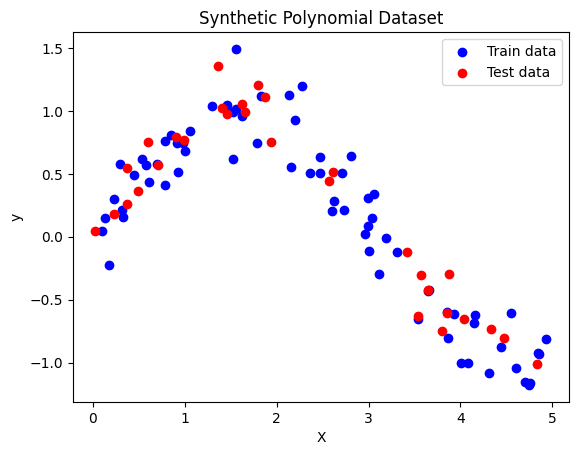

In [5]:
# True function: y = sin(x) + noise
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X_train, y_train, color="blue", label="Train data")
plt.scatter(X_test, y_test, color="red", label="Test data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Polynomial Dataset")
plt.legend()
plt.show()


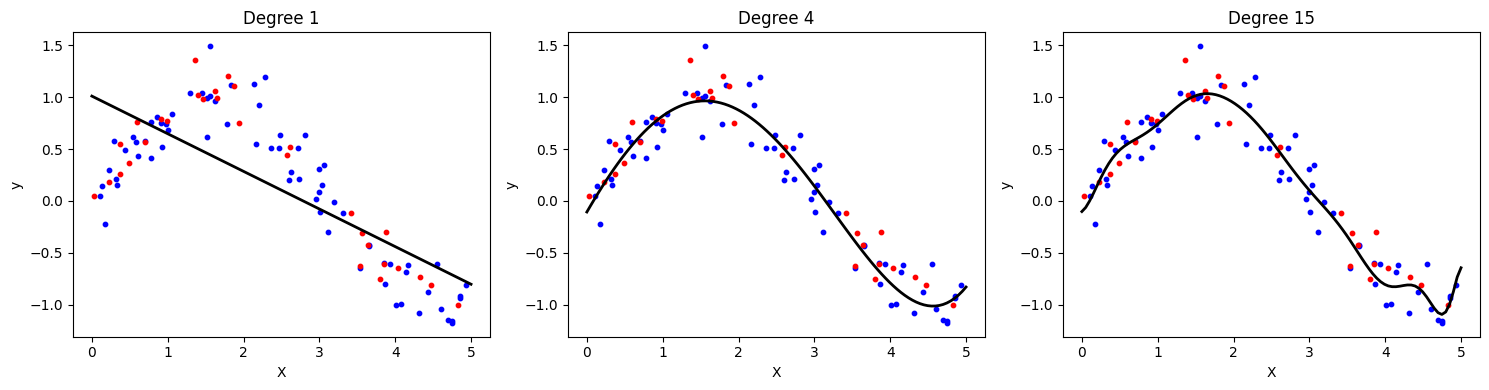

In [6]:
degrees = [1, 4, 15]  # Low → Medium → High complexity

plt.figure(figsize=(15, 4))

for i, d in enumerate(degrees, 1):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("linear", LinearRegression())
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color="blue", s=10, label="Train data")
    plt.scatter(X_test, y_test, color="red", s=10, label="Test data")
    
    X_curve = np.linspace(0, 5, 100).reshape(-1, 1)
    y_curve = model.predict(X_curve)
    plt.plot(X_curve, y_curve, color="black", lw=2)

    plt.title(f"Degree {d}")
    plt.xlabel("X")
    plt.ylabel("y")

plt.tight_layout()
plt.show()


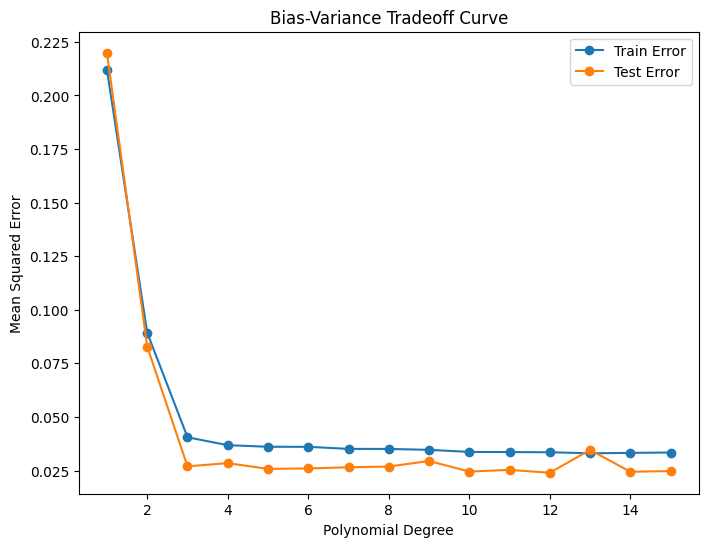

In [7]:
max_degree = 15
train_errors, test_errors = [], []

for d in range(1, max_degree+1):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("linear", LinearRegression())
    ])
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(8,6))
plt.plot(range(1, max_degree+1), train_errors, label="Train Error", marker="o")
plt.plot(range(1, max_degree+1), test_errors, label="Test Error", marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff Curve")
plt.legend()
plt.show()
